<a href="https://colab.research.google.com/github/rmiller34/ATMS-597-Project-5/blob/master/Attempt_at_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
#change directory to the right spot
import os 
os.chdir('/content/gdrive/My Drive/ATMS_597_Project_5')

### Read all years data file
from datetime import datetime
import pandas as pd

!pip install metpy
from metpy.io import parse_metar_to_dataframe
import glob
import numpy as np
filename= 'decoded_metar_dataset.csv'
decoded_metar_dataset=pd.read_csv(filename,dtype={'current_wx1':str})

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 194kB 8.7MB/s 


Cannot import USCOUNTIES and USSTATES without Cartopy installed.
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#decoded_metar_master['current_wx1'].unique
decoded_metar_master=decoded_metar_dataset

In [0]:
#decoded_metar_master = decoded_metar_master.dropna(axis=0, subset=['current_wx1','air_temperature'])

## Drop columns we don't plan on using or have too many NaNs
decoded_metar_master = decoded_metar_master.drop(['low_cloud_type',	'low_cloud_level',	'medium_cloud_type',	'medium_cloud_level',	'high_cloud_type',	'high_cloud_level',	'highest_cloud_type',	'highest_cloud_level',	'cloud_coverage', 'air_pressure_at_sea_level'], axis=1)

#decoded_metar_master = decoded_metar_master.dropna(axis=0)

In [5]:
#convert current_wx columns to list and also check how many rows we have 
current_wx1 = decoded_metar_master['current_wx1'].to_list()
print(len(current_wx1))
current_wx2 = decoded_metar_master['current_wx2'].to_list()
print(len(current_wx2))
current_wx3 = decoded_metar_master['current_wx3'].to_list()
print(len(current_wx3))

#Check to make sure we have some frozen AND liquid weather reported
print(current_wx1[0:50])

412974
412974
412974
['-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', 'HZ', '-SN', '-SN', '-SN', '-RA', '-RA', '-RA', 'RA', '-RA', '-RA', '-RA', 'BR', 'BR', 'BR']


In [0]:
### List of frozen and liquid precip options
fzn_list = ['-SNRA','SNRA','+SNRA','-SN','SN','+SN','-FZDZ','FZDZ','+FZDZ','-FZRA','FZRA','+FZRA','-FZFG','FZFG','+FZFG','-IC','IC','+IC','-GR','GR','GR','-SG','SG','+SG','-PL','PL','+PL']
liq_list = ['-RA','RA','+RA','-BR','BR','+BR','-TS','TS','+TS','-TSRA','TSRA','+TSRA']

In [0]:
### Set up a list to hold binary values (1 for frozen, 0 for liquid)
binary_list = []

### Loop over current_wx observations and determin if any are frozen precip. If so, set binary variable to 1. If not, set binary variable to 0.
for i in range(len(current_wx1)):
    if (current_wx1[i] in fzn_list) or (current_wx2[i] in fzn_list) or (current_wx3[i] in fzn_list):
        binary_list.append(1)
    else:
        binary_list.append(0)

In [8]:
### Fill a new column called 'fzn_or_liq' with the binary values.
decoded_metar_master['fzn_or_liq'] = binary_list

### Then drop current_wx2 and current_wx3 because they hold a lot of NaNs
decoded_metar_master = decoded_metar_master.drop(['current_wx2',	'current_wx3'], axis=1)
### Then drop all other rows with NaNs
decoded_metar_master = decoded_metar_master.dropna(axis=0)
### Check how many rows we are left with after cleaning up the dataframe
current_wx1 = decoded_metar_master['current_wx1'].to_list()
print(len(current_wx1))

389459


In [0]:
### Split data 70/30 between training/testing
from sklearn.model_selection import train_test_split
predictor_cols = ['air_temperature']
target_cols = ['fzn_or_liq']
X = decoded_metar_master[predictor_cols]
Y = decoded_metar_master[target_cols]
training_predictor, test_predictor, training_target, test_target = train_test_split(X, Y, test_size=0.3)

In [0]:
##training_target = training_predictor
##test_target = test_predictor
##training_target.drop(['date_time', 'station_id',	'latitude',	'longitude',	'elevation',	'wind_direction',	'wind_speed',	'current_wx1',	'current_wx2',	'current_wx3',	'low_cloud_type',	'low_cloud_level',	'medium_cloud_type',	'medium_cloud_level',	'high_cloud_type',	'high_cloud_level',	'highest_cloud_type',	'highest_cloud_level',	'cloud_coverage',	'air_temperature',	'dew_point_temperature',	'altimeter',	'present_weather',	'past_weather',	'past_weather2',	'air_pressure_at_sea_level',	'eastward_wind',	'northward_wind'], axis=1)
##test_target.drop(['date_time', 'station_id',	'latitude',	'longitude',	'elevation',	'wind_direction',	'wind_speed',	'current_wx1',	'current_wx2',	'current_wx3',	'low_cloud_type',	'low_cloud_level',	'medium_cloud_type',	'medium_cloud_level',	'high_cloud_type',	'high_cloud_level',	'highest_cloud_type',	'highest_cloud_level',	'cloud_coverage',	'air_temperature',	'dew_point_temperature',	'altimeter',	'present_weather',	'past_weather',	'past_weather2',	'air_pressure_at_sea_level',	'eastward_wind',	'northward_wind'], axis=1)
##training_predictor.drop(['fzn_or_liq'], axis=1)
##test_predictor.drop(['fzn_or_liq'], axis=1)

In [0]:
from sklearn.linear_model import LogisticRegression


In [0]:
### put air_temperature values in an array
training_predictor_array = training_predictor['air_temperature'].values
test_predictor_array = test_predictor['air_temperature'].values

In [0]:
# Initiate the model using the default parameters
logreg = LogisticRegression()

# Fit the model
#logreg.fit(training_predictor_array.reshape(-1,1), training_target['fzn_or_liq'])
logreg.fit(training_predictor_array.reshape(-1,1), training_target['fzn_or_liq'])

# Predictions
ptype_predict=logreg.predict(test_predictor_array.reshape(-1,1))
predsprob = logreg.predict_proba(test_predictor_array.reshape(-1,1))

In [0]:
#print(len(predsprob))
prob0 = []
prob1 = []
for i in range(len(predsprob)):
    prob0.append(predsprob[i][0])
    prob1.append(predsprob[i][1])

In [15]:
# Check skill with confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_target['fzn_or_liq'], ptype_predict)
cnf_matrix

array([[84424,  6875],
       [11721, 13818]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 257.44, 'Predicted label')

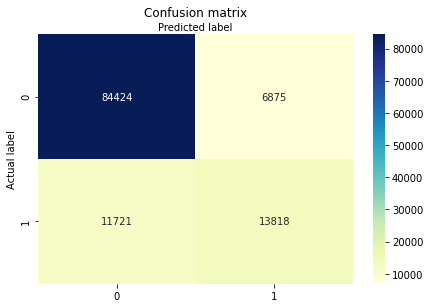

In [16]:
# Plot confusion matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
# Other performance metrics

#Jaccard Index, want this to be close to one
from sklearn.metrics import jaccard_similarity_score
j_index = jaccard_similarity_score(y_true=test_target['fzn_or_liq'],y_pred=ptype_predict)
round(j_index,2)

# F1-score
from sklearn.metrics import f1_score
f1_score(test_target['fzn_or_liq'], ptype_predict)

# Brier skill score
##from sklearn.metrics import brier_score_loss
##log_score = brier_score_loss((test_target['fzn_or_liq'].values).reshape(-1,1), predsprob[:][0])
##print('Brier:',log_score)
from sklearn.metrics import brier_score_loss
log_score = brier_score_loss(test_target['fzn_or_liq'],prob0)
print('Brier:',log_score)

# Precision score
from sklearn.metrics import precision_score
precision_score(test_target['fzn_or_liq'], ptype_predict)

Brier: 0.698460235178637


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6677620451360363

In [24]:
#Decision Tree
from sklearn.model_selection import train_test_split
predictor_cols = ['air_temperature']
target_cols = ['fzn_or_liq']
X = decoded_metar_master[predictor_cols]
Y = decoded_metar_master[target_cols]


,fzn_or_liq
1,1
2,1
3,1
4,1
5,1
...,...
412969,1
412970,1
412971,1
412972,1


In [19]:
predict_bin=pd.get_dummies(X)
predict_bin

,air_temperature
1,-6.0
2,-5.0
3,-5.0
4,-6.0
5,-6.0
...,...
412969,-4.0
412970,-4.0
412971,-4.0
412972,-4.0


In [0]:
## import dependencies
from sklearn import tree #For our Decision Tree
import pandas as pd # For our DataFrame
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph

In [0]:
clf=tree.DecisionTreeClassifier()
clf_train = clf.fit(predict_bin, Y)

In [23]:
print(tree.export_graphviz(clf_train, None))
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(Y.columns.values), 
                                class_names=['Rain', 'Frozen'], rounded=True, filled=True) #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 1.5\ngini = 0.342\nsamples = 389459\nvalue = [304331, 85128]"] ;
1 [label="X[0] <= -1.5\ngini = 0.496\nsamples = 151757\nvalue = [68952, 82805]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[0] <= -4.5\ngini = 0.465\nsamples = 99205\nvalue = [36469, 62736]"] ;
1 -> 2 ;
3 [label="X[0] <= -8.5\ngini = 0.433\nsamples = 55451\nvalue = [17588, 37863]"] ;
2 -> 3 ;
4 [label="X[0] <= -14.5\ngini = 0.403\nsamples = 22283\nvalue = [6245, 16038]"] ;
3 -> 4 ;
5 [label="X[0] <= -17.5\ngini = 0.484\nsamples = 4075\nvalue = [1668, 2407]"] ;
4 -> 5 ;
6 [label="X[0] <= -20.5\ngini = 0.5\nsamples = 1262\nvalue = [639, 623]"] ;
5 -> 6 ;
7 [label="X[0] <= -27.5\ngini = 0.492\nsamples = 431\nvalue = [188, 243]"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 10\nvalue = [10, 0]"] ;
7 -> 8 ;
9 [label="X[0] <= -24.5\ngini = 0.488\nsamples = 421\nvalue = [178, 243]"] ;
7 -> 9 ;
10 [label="X[0] <= -25.5\ngini = 0.487\nsamples = 31\n

NameError: ignored